Operator `initdamp` ran in 0.01 s


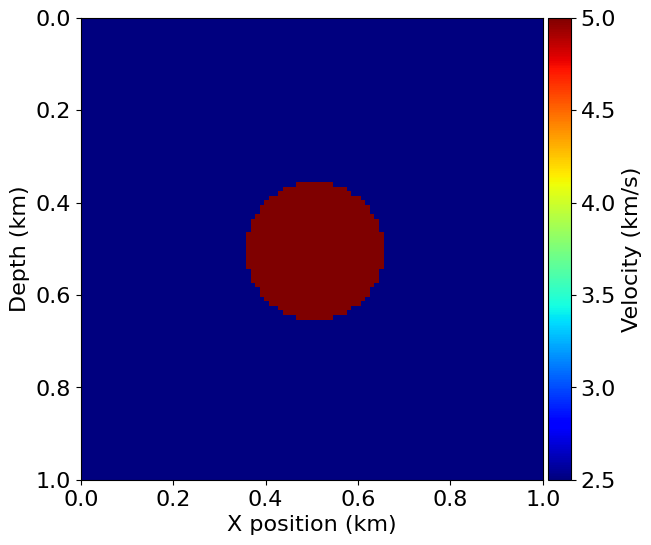

In [2]:
from examples.seismic import demo_model, plot_velocity, plot_perturbation
from examples.seismic import AcquisitionGeometry
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define true and initial model 
shape = (101, 101)  # Number of grid points (nx, nz)
spacing = (10., 10.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # Need origin to define relative source and receiver locations

model = demo_model('circle-isotropic', vp_circle=5.0, vp_background=2.5,
                    origin=origin, shape=shape, spacing=spacing, nbl=40, radio_custom=10)
plot_velocity(model)


In [ ]:

# Define source and receivers
t0 = 0.
tn = 1000. 
f0 = 0.01 #10Hz

src_coordinates = np.empty((1, 2))
src_coordinates[0, :] = np.array(model.domain_size) * .5
src_coordinates[0, 0] = 20.  # Depth is 20m
 
nreceivers = 101  # Number of receiver locations per shot 
rec_coordinates = np.empty((nreceivers, 2))
rec_coordinates[:, 1] = np.linspace(0, model.domain_size[0], num=nreceivers)
rec_coordinates[:, 0] = 0.

# Geometry
geometry = AcquisitionGeometry(model, rec_coordinates, src_coordinates, t0, tn, f0=f0, src_type='Ricker')

Operator `Forward` ran in 0.03 s


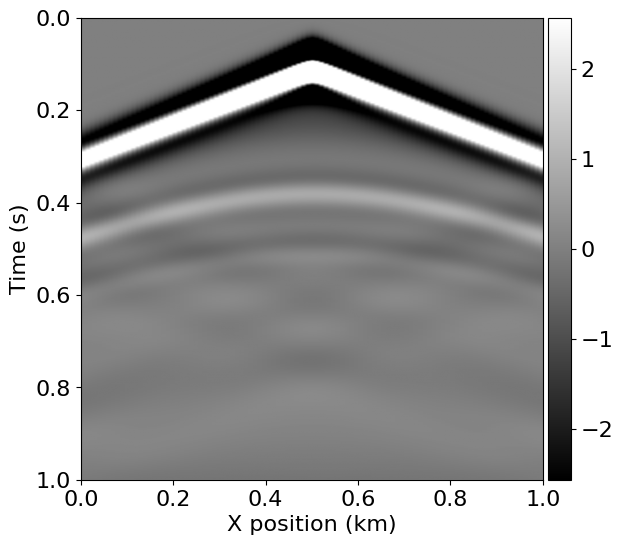

In [17]:

from examples.seismic.acoustic import AcousticWaveSolver

solver = AcousticWaveSolver(model, geometry, space_order=4)
true_d, u_, _ = solver.forward(vp=model.vp)

from examples.seismic import plot_shotrecord
plot_shotrecord(true_d.data, model, t0, tn)



In [23]:
print(u_.shape)

(3, 181, 181)


In [19]:
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift

# Get the wavefield data as a NumPy array (shape: time x z x x)
u_data = u_.data

# Perform FFT along time axis (axis=0), per spatial location (x, z)
u_freq = fft(u_data, axis=0)
freqs = fftfreq(u_data.shape[0], d=model.critical_dt)
u_freq = fftshift(u_freq, axes=0)
freqs = fftshift(freqs)


In [24]:
print(freqs)

[-0.27210882  0.          0.27210882]
